#Import Dependencies

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.optimizers
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.8.2


# Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Check what GPU is attatched to this session
To activate GPU:
-> Runtime -> Change Runtime Type -> Hardware Accelerator = GPU

In [4]:
!nvidia-smi

Sat Aug 20 20:19:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Importing and Checking Data

In [5]:
DEAD_FILE_PATH = '/content/gdrive/MyDrive/train/dead/'
ALIVE_FILE_PATH = '/content/gdrive/MyDrive/train/alive/'

TRAIN_FILE_PATH = '/content/gdrive/MyDrive/train/'
TEST_FILE_PATH = '/content/gdrive/MyDrive/test/'
VALIDATION_FILE_PATH = '/content/gdrive/MyDrive/validation/'

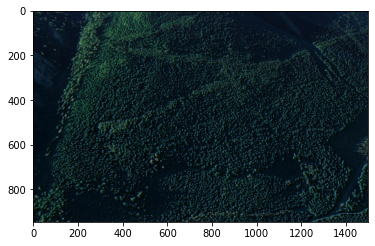

In [6]:
img = image.load_img( TEST_FILE_PATH +'Screenshot 2022-08-20 at 15.54.09.png')
plt.imshow(img)

In [7]:
for filename in os.listdir(DEAD_FILE_PATH):
  full_path = os.path.join(DEAD_FILE_PATH, filename)
  if 'DS_Store' in filename or '.ipynb' in filename:
    print('DS_Store / .ipnyb file is not supposed to be here, skipping')
  else:
    print(filename)
    print(full_path)
    print(cv2.imread(full_path).shape)

Screenshot 2022-08-20 at 09.00.15.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.00.15.png
(900, 1742, 3)
Screenshot 2022-08-20 at 09.01.21.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.01.21.png
(1080, 1762, 3)
Screenshot 2022-08-20 at 09.01.41.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.01.41.png
(1122, 1726, 3)
Screenshot 2022-08-20 at 09.01.58.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.01.58.png
(520, 964, 3)
Screenshot 2022-08-20 at 09.03.27.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.03.27.png
(1040, 1702, 3)
Screenshot 2022-08-20 at 09.26.15.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.26.15.png
(1436, 2208, 3)
Screenshot 2022-08-20 at 09.30.41.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.30.41.png
(1086, 1962, 3)
Screenshot 2022-08-20 at 09.31.50.png
/content/gdrive/MyDrive/train/dead/Screenshot 2022-08-20 at 09.31.50.png
(12

#Normalise data and format


In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset = train.flow_from_directory(TRAIN_FILE_PATH,
                                          target_size = (500,500),
                                          class_mode = 'binary',
                                          batch_size = 3)

Found 68 images belonging to 2 classes.


In [10]:
validation_dataset = validation.flow_from_directory(VALIDATION_FILE_PATH,
                                          target_size = (500,500),
                                          class_mode = 'binary',
                                          batch_size = 3)

Found 9 images belonging to 2 classes.


Check that the alive and dead are mapped to the same value for test and train data

In [11]:
print(train_dataset.class_indices)
print(validation_dataset.class_indices)

{'alive': 0, 'dead': 1}
{'alive': 0, 'dead': 1}


In [52]:
model_catagory = ''

#Generate Models
Only run one of the following models at a time


Model Generation 1:

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), strides = (2,2), padding = 'valid', input_shape = (500,500, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1), padding = 'valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()
model_catagory += ('1')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 248, 248, 32)      2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 120, 120, 64)      51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 60, 60, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 58, 58, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 29, 29, 128)     

Model Generation 2:

In [53]:
# 'More is better'
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), strides = (3,3), padding = 'valid', input_shape = (500,500, 3)),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), strides = (2,2), padding = 'valid'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'valid'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'valid'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='relu')])
model.summary()
model_catagory +='2'

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 166, 166, 16)      1216      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 83, 83, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 40, 40, 32)        12832     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 9, 9, 64)       

Model Generation 3:


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (500,500, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()
model_catagory +='3'

#Compile the model 
Compile with different optimizers

In [33]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
model_catagory += 'A'

In [54]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
model_catagory += 'B'

#Fit data to one model
For more rescources intensive tasks use fewer epochs.

1: 25 epochs

In [ ]:
model_fit = model.fit(train_dataset, epochs = 25, validation_data = validation_dataset, steps_per_epoch=3)
model_catagory += '1'

2: 10 epochs (use for more complex modles)

In [56]:
model_fit = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset, steps_per_epoch=5)
model_catagory += '2'

Epoch 1/10
5/5 [==============================] - 2s 533ms/step - loss: 1.0283 - binary_accuracy: 0.9333 - val_loss: 5.1416 - val_binary_accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 2s 432ms/step - loss: 1.1018 - binary_accuracy: 0.9286 - val_loss: 5.1416 - val_binary_accuracy: 0.6667
Epoch 3/10
5/5 [==============================] - 2s 401ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000 - val_loss: 5.1416 - val_binary_accuracy: 0.6667
Epoch 4/10
5/5 [==============================] - 2s 428ms/step - loss: 1.0283 - binary_accuracy: 0.9333 - val_loss: 5.1416 - val_binary_accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 2s 433ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000 - val_loss: 5.1416 - val_binary_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 2s 409ms/step - loss: 5.1416 - binary_accuracy: 0.6667 - val_loss: 5.1416 - val_binary_accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 2s 398ms/step - lo

In [58]:
img = image.load_img(TEST_FILE_PATH + 'Screenshot 2022-08-20 at 15.54.09.png')
image_array = image.img_to_array(img)
expanded_image_array = np.expand_dims(image_array, axis = 0)
images = np.vstack([expanded_image_array])
resized_image = tf.image.resize(
    images,
    size = (500,500))
prediction = model.predict(resized_image)
print(prediction)
if prediction == [[1.]]:
  print('Dead forest')
elif prediction == [[0.]]:
  print('Alive forest')
else:
  print('Error with model, did not return 0 or 1')
# Reset model_catagory after each run!


[[0.]]
Alive forrest


In [59]:
print('Model Number: ' + model_catagory)
model_catagory = ''

Model Number: 2B22
